# Wstęp do Sztucznej Inteligencji - rok akademicki 2021/2022

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat:  Wnioskowanie oparte na wiedzy niepewnej. Wnioskowanie rozmyte
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

Na niniejszych laboratoriach będziemy wykorzystywać bibliotekę `fuzzython`(https://github.com/yudivian/fuzzython). Orginalny moduł zawierał kilka błędów przez co nie dało się go zainstalować za pomocą `pip`. Aby móc z niego zkorzystać należy pobrać zmodyfikowany moduł `fuzzython.zip` (plik dostępny na delcie), rozpakować go i wrzucić na dysk google, a następnie wykonać poniższą komórkę montującą dysk google:


In [3]:
import sys
from google.colab import drive
drive.mount('/content/drive')
# upewniej się że poniższa ścieżka jest poprawna
path_nb = r'/content/drive/My Drive/Colab Notebooks'
sys.path.append(path_nb)

Mounted at /content/drive


Przy importowaniu elementów z modułu `fuzzython` używamy konstrukcji:
```python
from fuzzython.nazwa_podmodulu import jakies, funkcje, klasy, itp.
```

## Zadanie 1 (obowiązkowe, 5pkt)
Zaprojektuj system rozmyty typu Mamdani, który będzie oceniał stopień przekonania o możliwości spowodowania wypadku podczas jazdy samochodem.

Zmienne wejściowe: 

- prędkość jazdy (10 − 200km/h ): `mała`, `średnia`, `szybka`, `bardzo szybka` 
- widoczność (0.05 − 4km): `bardzo słaba`, `średnia`, `dobra`. 

Wyjście systemu: 

- stopień przekonania o możliwości spowodowania wypadku (0 − 1): `bardzo małe`, `małe`, `średnie`, `duże`.

Zdefiniuj własne kształty dla zbiorów rozmytych, stwórz własne reguły oraz przygotuj wykresy ilustrujące funkcje przynależności zbiorów rozmytych jak również powierzchnię decyzyjną sterownika rozmytego.

### TWÓJ PROGRAM:

{'rb_mamdani': {'accident': 0.5147205251313464}}
reduce() of empty sequence with no initial value


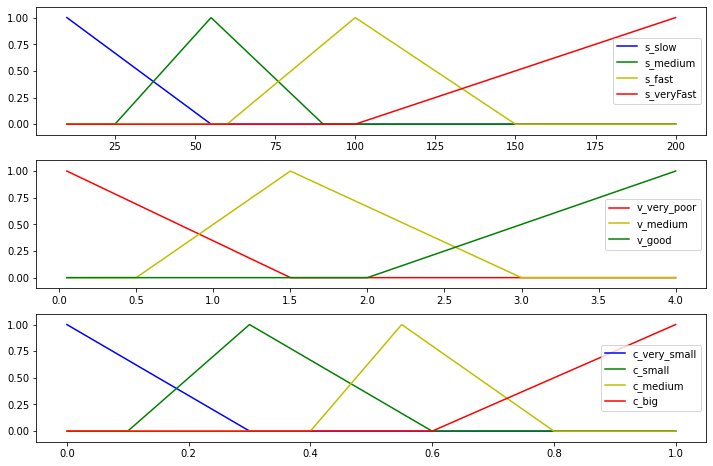

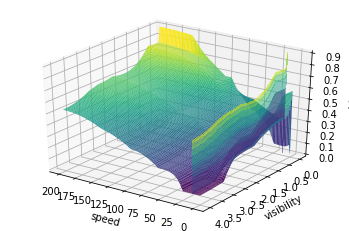

In [23]:
from fuzzython.fsets.triangular import Triangular
from fuzzython.variable import Variable
from fuzzython.adjective import Adjective
from fuzzython.ruleblock import RuleBlock
from fuzzython.systems.mamdani import MamdaniSystem
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt

# pomocnicza funkcja do rysowania zbiorów rozmytych
def plot_fuzzyset(ax, fuzzy_set, x, *args, **kwargs):
    y = np.array([fuzzy_set(e) for e in x])
    ax.plot(x, y,  *args, **kwargs)
    ax.set_ylim(-0.1, 1.1)
    ax.legend()

#speed
s_slow = Triangular((0, 0), (10, 1), (55, 0))
s_medium = Triangular((25, 0), (55, 1), (90, 0))
s_fast = Triangular((60, 0), (100, 1), (150, 0))
s_veryFast = Triangular((100, 0), (200, 1), (200.1, 0))
a_s_slow = Adjective('s_slow', s_slow)
a_s_medium = Adjective('s_medium', s_medium)
a_s_fast = Adjective('s_fast', s_fast)
a_s_veryFast = Adjective('s_veryFast', s_veryFast)
speed = Variable('speed', 'km/h', a_s_slow, a_s_medium, a_s_fast, a_s_veryFast)

#visibility
v_very_poor = Triangular((0, 0), (0.05, 1), (1.5, 0))
v_medium = Triangular((0.5, 0), (1.5, 1), (3, 0))
v_good = Triangular((2, 0), (4, 1), (4.1, 0))
a_v_very_poor = Adjective('v_very_poor', v_very_poor)
a_v_medium = Adjective('v_medium', v_medium)
a_v_good = Adjective('v_good', v_good)
visibility = Variable('visibility', 'km', a_v_very_poor, a_v_medium, a_v_good)

#chance of causing an accident
c_very_small = Triangular((-0.1, 0), (0, 1), (0.3, 0))
c_small = Triangular((0.1, 0), (0.3, 1), (0.6, 0))
c_medium = Triangular((0.4, 0), (0.55, 1), (0.8, 0))
c_big = Triangular((0.6, 0), (1, 1), (1.1 , 0))
a_c_very_small = Adjective('c_very_small', c_very_small)
a_c_small = Adjective('c_small', c_small)
a_c_medium = Adjective('c_medium', c_medium)
a_c_big = Adjective('c_big', c_big)
accident = Variable('accident', 'p',a_c_very_small, a_c_small, a_c_medium, a_c_big, defuzzification='COG', default=0)

x = np.linspace(10,200,1000)
x1 = np.linspace(0.05,4,1000)
x2 = np.linspace(0,1,1000)
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,8))
((ax1), (ax2), (ax3)) = axs
plot_fuzzyset(ax1, s_slow, x, 'b', label='s_slow')
plot_fuzzyset(ax1, s_medium, x, 'g', label='s_medium')
plot_fuzzyset(ax1, s_fast, x, 'y', label='s_fast')
plot_fuzzyset(ax1, s_veryFast, x, 'r', label='s_veryFast')
plot_fuzzyset(ax2, v_very_poor, x1, 'r', label='v_very_poor')
plot_fuzzyset(ax2, v_medium, x1, 'y', label='v_medium')
plot_fuzzyset(ax2, v_good, x1, 'g', label='v_good')
plot_fuzzyset(ax3, c_very_small, x2, 'b', label='c_very_small')
plot_fuzzyset(ax3, c_small, x2, 'g', label='c_small')
plot_fuzzyset(ax3, c_medium, x2, 'y', label='c_medium')
plot_fuzzyset(ax3, c_big, x2, 'r', label='c_big')


scope = locals()

rule1 = 'if speed is a_s_slow or visibility is a_v_good then accident is a_c_very_small'
rule2 = 'if speed is a_s_medium or visibility is a_v_medium then accident is a_c_small'
rule3 = 'if speed is a_s_fast or visibility is a_v_very_poor then accident is a_c_medium'
rule4 = 'if speed is a_s_veryFast then accident is a_c_big'

# operators - operatory dla przecięcia, sumy i dopełnienia zbiorów rozmytych
# activation - operator dla implikacji
# accumulation - operator dla agregacji reguł
block = RuleBlock('rb_mamdani', operators=('MIN','MAX','ZADEH'), activation='MIN', accumulation='MAX')
block.add_rules(rule1, rule2, rule3, rule4, scope=scope)

mamdani = MamdaniSystem('mamdani_model', block)

# dane wejściowe
inputs = {'speed': 130, 'visibility': 2.5} #tak naprawdę to można podać liczby rzeczywiste od 0 do 10
# obliczenie odpowiedzi
res = mamdani.compute(inputs)
#zwraca słownik
res
print(res)

# przygotowanie siatki
sampled1 = np.linspace(0, 200, 100)
sampled2 = np.linspace(0, 4, 100)
x, y = np.meshgrid(sampled1, sampled2)
z = np.zeros((len(sampled1),len(sampled1)))

for i in range(len(sampled1)):
    for j in range(len(sampled1)):
        inputs = {'speed': x[i, j], 'visibility': y[i, j]}
        res = mamdani.compute(inputs)
        z[i, j] = res['rb_mamdani']['accident']
            
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset= -1, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset= 11, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset= 11, cmap='viridis', alpha=0.5)
ax.set_xlabel('speed')
ax.set_ylabel('visibility')
ax.set_zlabel('accident')
ax.view_init(30, 125)

## Zadanie 2 (obowiązkowe, 5pkt)
Zaprojektuj system rozmyty typu Takagi-Sugeno, który będzie prognozował cenę akcji na jeden dzień do przodu.

Zmienne wejściowe: 

- cena akcji wczoraj (1 − 20zł): `niska`, `średnia`, `wysoka`, 

- cena akcji dziś (1 − 20zł): `niska`, `średnia`, `wysoka`. 

Wyjście systemu: 

- cena akcji jutro dana równaniem regresji: $\alpha\cdot x + \beta\cdot y + \gamma$

Reguły postaci:

- Jeśli cena akcji wczoraj była $A_i$ i cena akcji dziś jest $B_i$ to cena akcji jutro będzie $\alpha_k\cdot x + \beta_k\cdot y + \gamma_k$,

gdzie:

- $x$ to cena akcji wczoraj (ostra wartość)

- $y$ to cena akcji dziś (ostra wartość)

- $A_i, B_i$ to zbiory rozmyte odpowiednio dla ceny akcji wczoraj i dziś

- $\alpha_k, \beta_k, \gamma_k$ - współczynniki w równaniu regresji (liczby rzeczywiste)

- $k$ - numer reguły

Zdefiniuj własne kształty dla zbiorów rozmytych, stwórz własne reguły (dobór współczynników regresji) oraz przygotuj wykresy ilustrujące funkcje przynależności zbiorów rozmytych jak również powierzchnię decyzyjną sterownika rozmytego.

### TWÓJ PROGRAM:

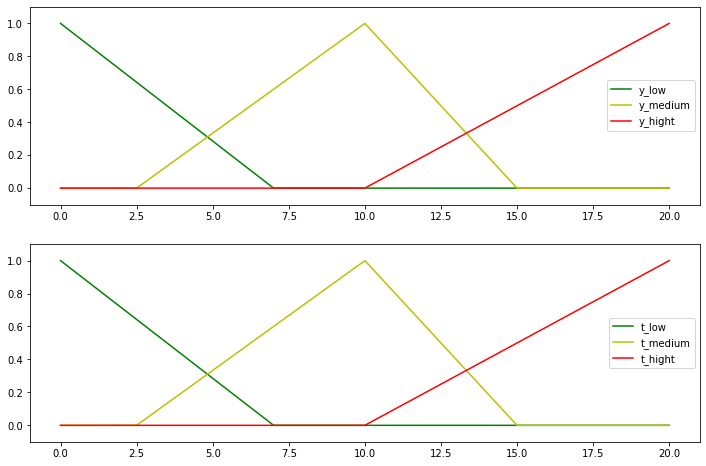

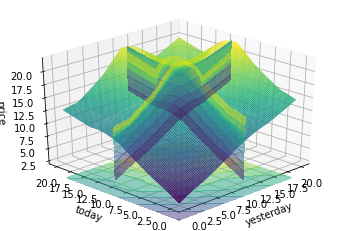

In [8]:
from fuzzython.fsets.triangular import Triangular
from fuzzython.variable import Variable
from fuzzython.adjective import Adjective
from fuzzython.ruleblock import RuleBlock
from fuzzython.systems.sugeno import SugenoSystem
from mpl_toolkits.mplot3d import Axes3D

# pomocnicza funkcja do rysowania zbiorów rozmytych
def plot_fuzzyset(ax, fuzzy_set, x, *args, **kwargs):
    y = np.array([fuzzy_set(e) for e in x])
    ax.plot(x, y,  *args, **kwargs)
    ax.set_ylim(-0.1, 1.1)
    ax.legend()

#yesterday's share price
y_low = Triangular((-0.1, 0), (0, 1), (7, 0))
y_medium = Triangular((2.5, 0), (10, 1), (15, 0))
y_hight = Triangular((10, 0), (20, 1), (20.1, 0))
a_y_low = Adjective('y_low', y_low)
a_y_medium = Adjective('y_medium', y_medium)
a_y_hight = Adjective('y_hight', y_hight)
yesterday = Variable('yesterday', 'zl', a_y_low, a_y_medium, a_y_hight)

#today's share price
t_low = Triangular((-0.1, 0), (0, 1), (7, 0))
t_medium = Triangular((2.5, 0), (10, 1), (15, 0))
t_hight = Triangular((10, 0), (20, 1), (20.1, 0))
a_t_low = Adjective('t_low', t_low)
a_t_medium = Adjective('t_medium', t_medium)
a_t_hight = Adjective('t_hight', t_hight)
today = Variable('today', 'zl', a_t_low, a_t_medium, a_t_hight)

x = np.linspace(0,20,1000)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
((ax1), (ax2)) = axs

plot_fuzzyset(ax1, y_low, x, 'g', label='y_low')
plot_fuzzyset(ax1, y_medium, x, 'y', label='y_medium')
plot_fuzzyset(ax1, y_hight, x, 'r', label='y_hight')

plot_fuzzyset(ax2, t_low, x, 'g', label='t_low')
plot_fuzzyset(ax2, t_medium, x, 'y', label='t_medium')
plot_fuzzyset(ax2, t_hight, x, 'r', label='t_hight')

rule1 = 'if yesterday is a_y_low or today is a_t_low then z=0.7*yesterday+0.75*today+2.3'
rule2 = 'if yesterday is a_y_medium or today is a_t_medium then z=0.9*yesterday+0.95*today+0.3'
rule3 = 'if yesterday is a_y_hight or today is a_t_hight then z=0.60*yesterday+0.35*today+1'

block = RuleBlock('rb_takagi', operators=('MIN', 'MAX', 'ZADEH'), activation='MIN', accumulation='MAX')
block.add_rules(rule1, rule2, rule3, scope=scope)

sugeno = SugenoSystem('model_takagi', block)

# dane wejściowe (Spółka AILLERON(PLWNDMB00010) na dzień 21.04.2021 )
inputs = {'yesterday': 15.9, 'today': 15.6}
# obliczenie odpowiedzi
res = sugeno.compute(inputs)
# zwraca słownik, trochę inaczej niż w mamdani
res

# przygotowanie siatki
sampled = np.linspace(0, 20, 100)
x, y = np.meshgrid(sampled, sampled)
z = np.zeros((len(sampled),len(sampled)))

for i in range(len(sampled)):
    for j in range(len(sampled)):
        inputs = {'yesterday': x[i, j], 'today': y[i, j]}
        res = sugeno.compute(inputs)
        z[i, j] = res['rb_takagi']
            
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset= -1, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset= 11, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset= 11, cmap='viridis', alpha=0.5)
ax.set_xlabel('yesterday')
ax.set_ylabel('today')
ax.set_zlabel('price')
ax.view_init(30, 225)

&copy; Katedra Informatyki, Politechnika Krakowska